
mmdetection 과 같은 라이브러리를 사용하면 쉽게 다양한 모델을 활용할 수 있다.

https://github.com/open-mmlab/mmdetection

Instance Segmentation을 해봅시다


In [1]:
# 라이브러리 설치

!pip install openmim
!mim install mmdet # mim은 mm openlab의 자체 인스톨 패키지

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=28b76999ca611626e00bbf8782dc4a1025a8a7a29b3dd1ce9c13b86c02d00270
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
installing mmdet from https://github.com/open-mmlab/mmdetection.git.
Cloning into '/tmp/tmps6_ddh62/mmdetection'...
remote: Enumerating objects: 24334, done.
remote: Total 24334 (delta 0), reused 0 (delta 0), pack-reused 24334
Receiving objects: 100% (24334/24334), 37.48 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (17021/17021), done.
Note: checking out '73b4e65a6a30435ef6a35f405e3474a4d9cfb234'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or l

In [2]:
from mmdet.apis import init_detector, inference_detector
import mmcv

원하는 모델을 선택하고 설정이 들어있는 config 파일을 다운로드 합니다

https://github.com/open-mmlab/mmdetection

In [3]:
# config_file 다운로드
# https://github.com/open-mmlab/mmdetection/tree/master/configs/mask_rcnn 에서 pretrained model의 config 링크를 지정합니다. 
# mask rcnn을 불러옵니다

!mim download mmdet --config mask_rcnn_r50_fpn_mstrain-poly_3x_coco --dest .

processing mask_rcnn_r50_fpn_mstrain-poly_3x_coco...
  [####################################]  100%          
Successfully downloaded mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth to /content
Successfully dumped mask_rcnn_r50_fpn_mstrain-poly_3x_coco.py to /content


In [ ]:
# 디바이스 설정
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
# 모델 파일 다운로드

!wget 'https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth' 

--2022-05-05 10:27:03--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.18
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177868694 (170M) [application/octet-stream]
Saving to: ‘mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth.1’

mask_rcnn_r50_fpn_m 100%[===================>] 169.63M  16.3MB/s    in 11s     

2022-05-05 10:27:14 (16.0 MB/s) - ‘mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth.1’ saved [177868694/177868694]



In [5]:
!ls

drive
mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth.1
mask_rcnn_r50_fpn_mstrain-poly_3x_coco.py
sample_data


이미지를 불러서 적용해봅시다. 

In [6]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# Config 파일과 모델 파일(체크포인트) 지정합니다. 
config_file = 'mask_rcnn_r50_fpn_mstrain-poly_3x_coco.py'
checkpoint_file = 'mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth'

# 두 개의 파일로부터 모델을 생성합니다. 
model = init_detector(config_file, checkpoint_file, device='cuda')


load checkpoint from local path: mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth


In [7]:
# 테스트 이미지를 불러오고 감지합니다. 
img = '/content/drive/MyDrive/Teaching/Pytorch/demo.jpg'  
result = inference_detector(model, img)

# 결과를 보여줍니다. 
model.show_result(img, result, out_file='result.jpg') 

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [8]:
!ls

drive
mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth.1
mask_rcnn_r50_fpn_mstrain-poly_3x_coco.py
result.jpg
sample_data


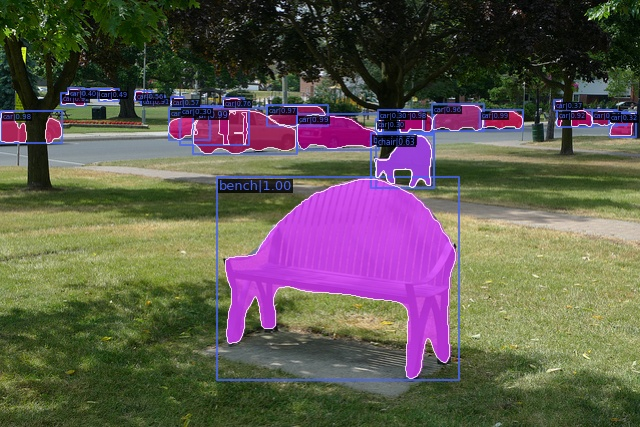

In [9]:


from IPython.display import Image
Image(filename='result.jpg') 